In [ ]:
import tensorflow as tf
from urllib.request import urlretrieve
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
from IPython import display
from tensorflow.keras import models, layers, activations, initializers, regularizers
from tensorflow.keras.models import Model, Sequential

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
def prepare_data(X_train, y_train, X_test, y_test):
  X_train = X_train/255.
  X_test = X_test/255.
  print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
  print(f'before one hot y_train shape: {y_train.shape}\ny_test shape: {y_test.shape}\n')
  y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
  y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')
  print(f'after one hot Train_y shape: {y_train_one_hot.shape}\nVal_y shape: {y_test_one_hot.shape}')
  return X_train, X_test, y_train_one_hot, y_test_one_hot

In [ ]:
X_train, X_test, y_train, y_test = prepare_data(X_train, y_train, X_test, y_test)

X_train shape: (50000, 32, 32, 3), X_test shape: (10000, 32, 32, 3)
before one hot y_train shape: (50000, 1)
y_test shape: (10000, 1)

after one hot Train_y shape: (50000, 10)
Val_y shape: (10000, 10)


In [ ]:
input = layers.Input(shape=(32, 32, 3))

layer1 = layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer="he_normal")(input)
layer2 = layers.BatchNormalization()(layer1)
layer3 = layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer="he_normal")(layer2)
layer4 = layers.BatchNormalization()(layer3)
layer5 = layers.MaxPooling2D(pool_size=(2,2))(layer4)
layer6 = layers.Dropout(0.4)(layer5)

layer7 = layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer="he_normal")(layer6)
layer8 = layers.BatchNormalization()(layer7)
layer9 = layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer="he_normal")(layer8)
layer10 = layers.BatchNormalization()(layer9)
layer11 = layers.MaxPooling2D(pool_size=(2,2))(layer10)
layer12 = layers.Dropout(0.4)(layer11)

layer13 = layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer="he_normal")(layer12)
layer14 = layers.BatchNormalization()(layer13)
layer15 = layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer="he_normal")(layer14)
layer16 = layers.BatchNormalization()(layer15)
layer18 = layers.MaxPooling2D(pool_size=(2,2))(layer16)
layer19 = layers.Dropout(0.5)(layer18)

layer20 = layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer="he_normal")(layer19)
layer21 = layers.BatchNormalization()(layer20)
layer22 = layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer="he_normal")(layer21)
layer23 = layers.BatchNormalization()(layer22)
layer24 = layers.MaxPooling2D(pool_size=(2,2))(layer23)
layer25 = layers.Dropout(0.5)(layer24)

layer26 = layers.Flatten()(layer25)
layer27 = layers.BatchNormalization()(layer26)
layer28 = layers.Dense(256, activation='relu', kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(1e-4))(layer27)
layer29 = layers.BatchNormalization()(layer28)
layer30 = layers.Dropout(0.5)(layer29)

output = layers.Dense(10, activation='softmax')(layer30)

model = Model(input, output)
print(model.summary())


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_50 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_51 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 64)       0   

In [ ]:
opt = tf.keras.optimizers.Adam()
model.compile(loss='CategoricalCrossentropy', optimizer=opt , metrics=['accuracy'])

In [ ]:
def fit_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
  train_loss = []
  train_acc= []
  test_loss = []
  test_acc = []
  best_validation_accuracy = 0
  for i in range(epochs):
    st = time.time()
    history = model.fit(x=X_train, y=y_train, batch_size=batch_size)
    trainloss = history.history['loss']
    trainacc = history.history['accuracy']
    train_loss.append(trainloss)
    train_acc.append(trainacc)

    score = model.evaluate(x=X_test, y=y_test, batch_size=5)
    testloss = score[0]
    testacc = score[1]
    test_loss.append(testloss)
    test_acc.append(testacc)

    if testacc > best_validation_accuracy:
      best_validation_accuracy = testacc
    
    fig = plt.figure(figsize=(9, 6))
    train_loss_plt, = plt.plot(range(len(train_loss)), train_loss, 'r', label='train_loss')
    train_acc_plt, = plt.plot(range(len(train_acc)), train_acc, 'g', label='train_acc')
    val_loss_plr, = plt.plot(range(len(test_loss)), test_loss, alpha=0.3, color='r', label='val_loss')
    val_acc_plt, = plt.plot(range(len(test_acc)), test_acc, alpha=0.3, color='g', label='val_acc')
    plt.legend([train_loss_plt, train_acc_plt, val_loss_plr, val_acc_plt],
               ['training loss', 'training accuracy', 'validation loss', 'validation accuracy'],
               loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Best validation accuracy = {:.2f}%'.format(100. * best_validation_accuracy))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(.2)

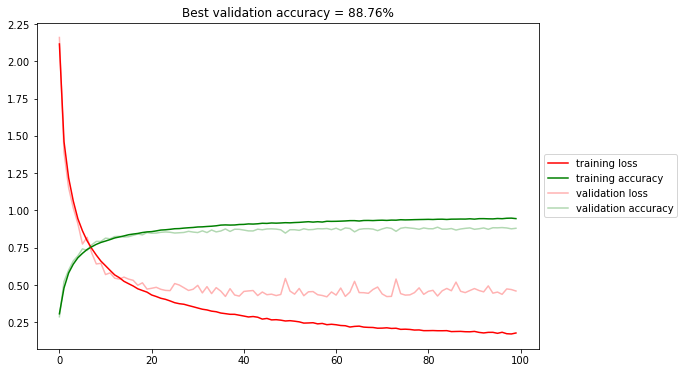

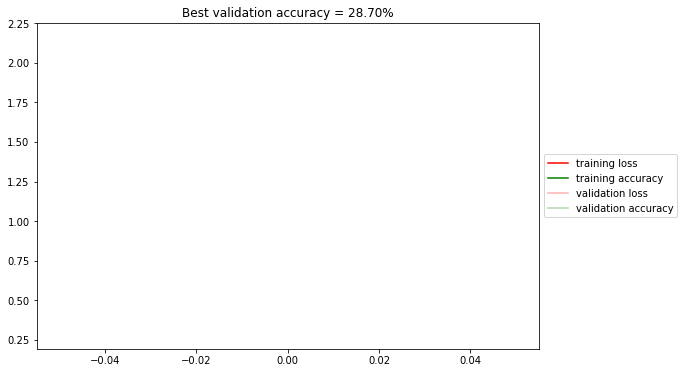

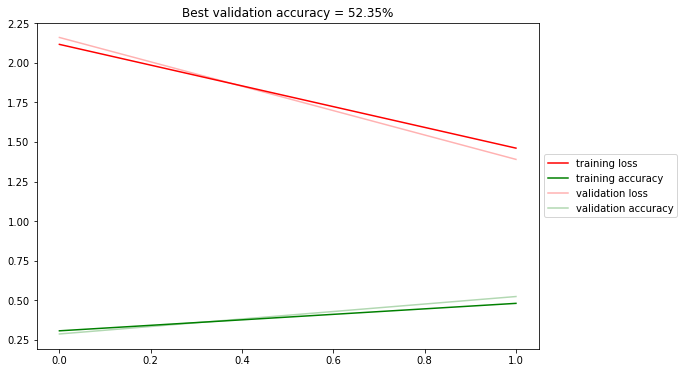

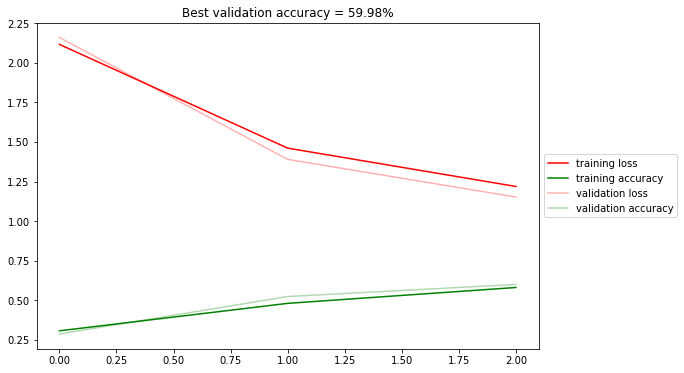

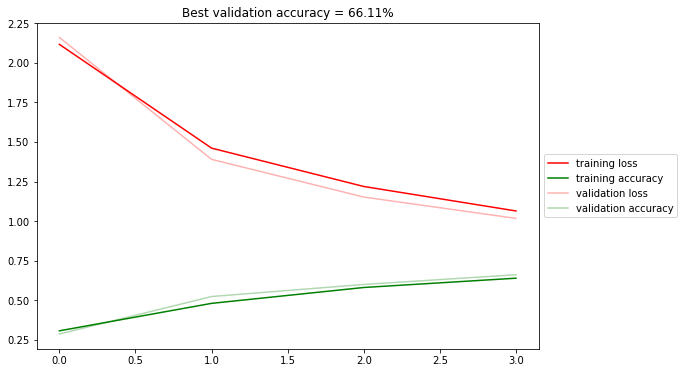

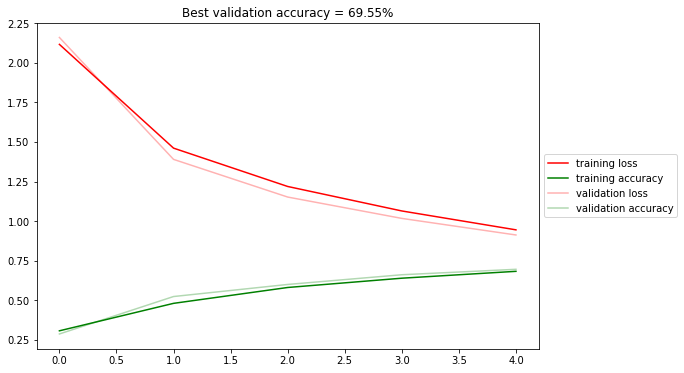

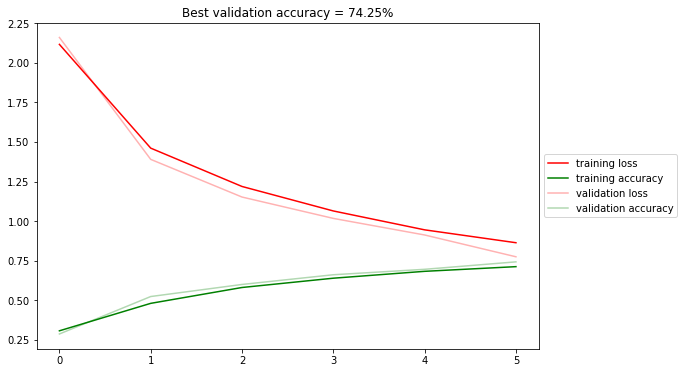

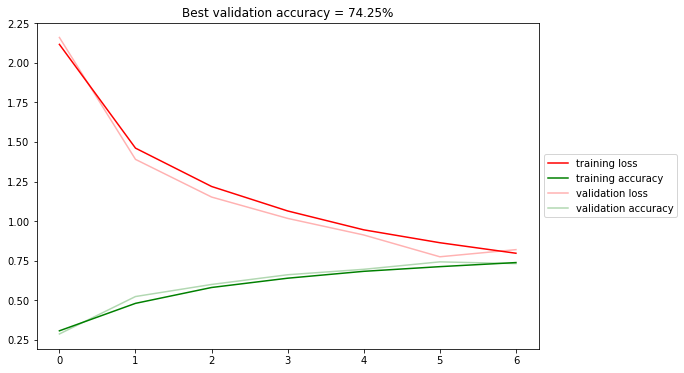

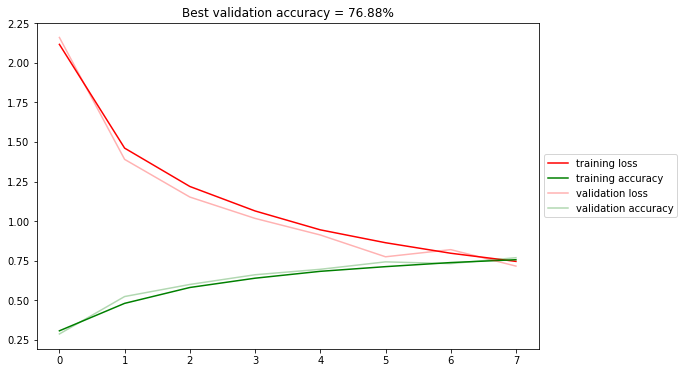

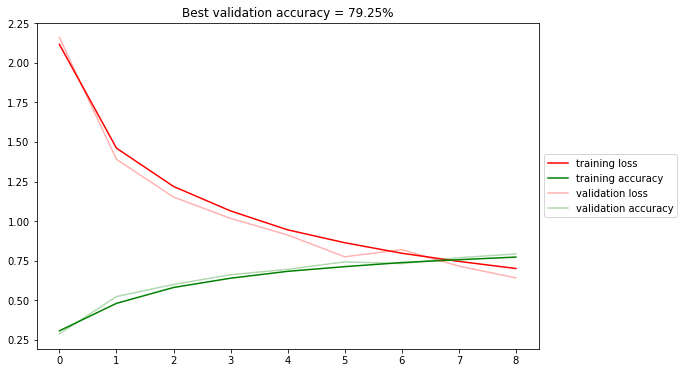

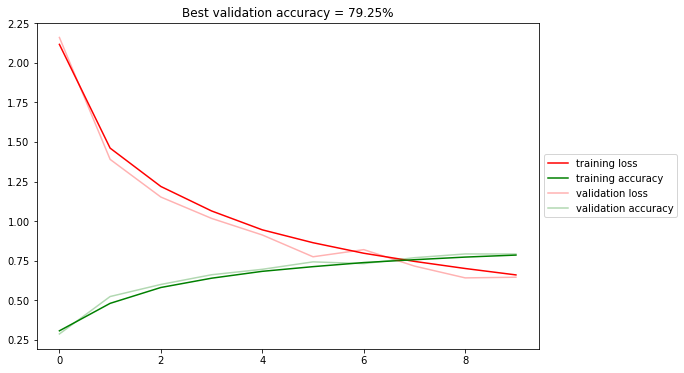

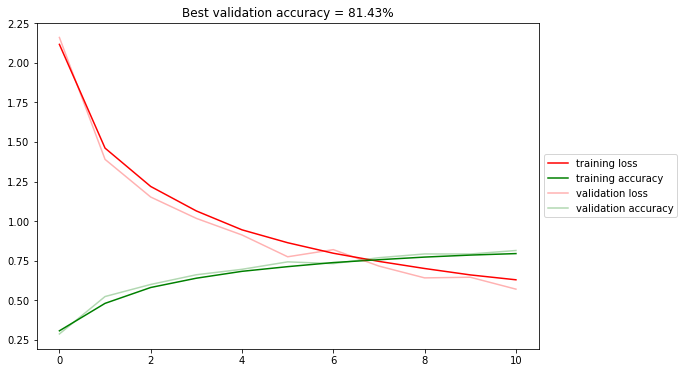

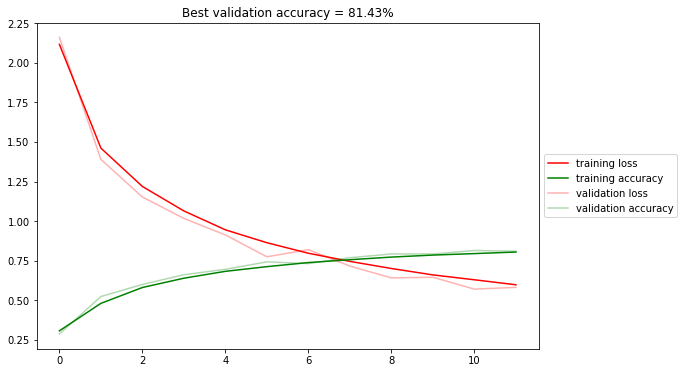

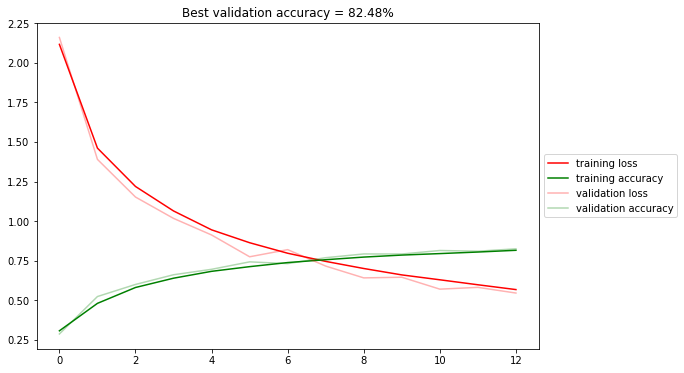

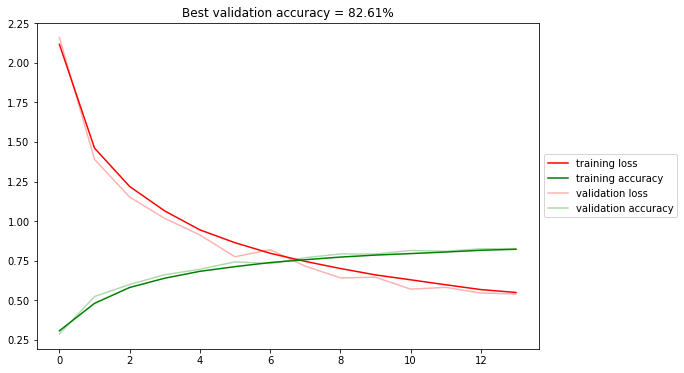

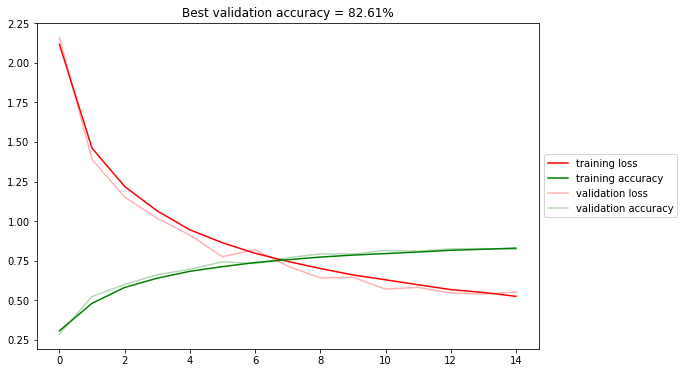

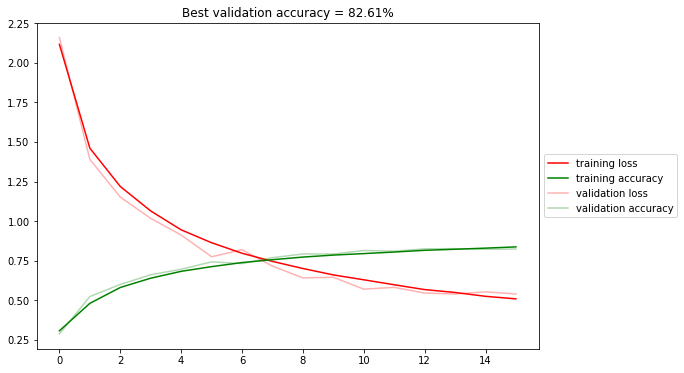

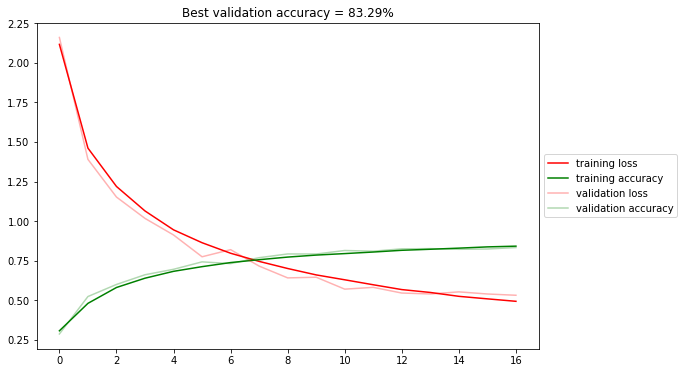

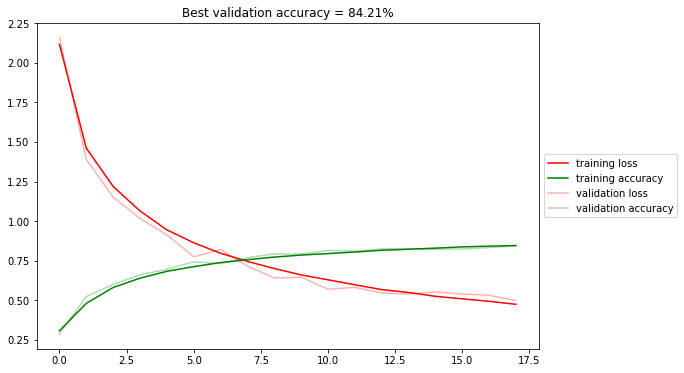

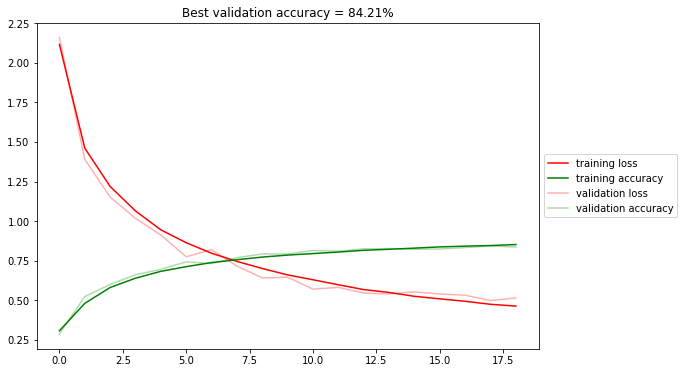

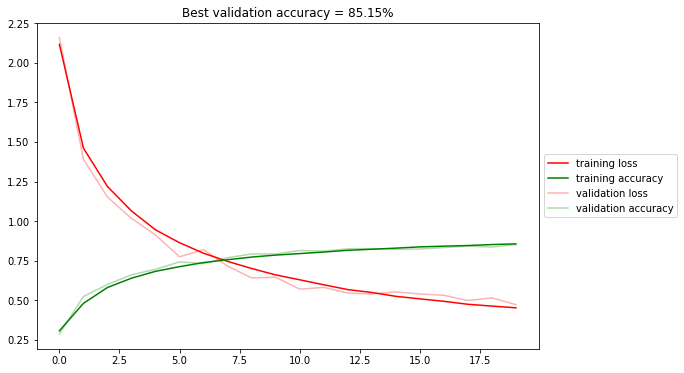

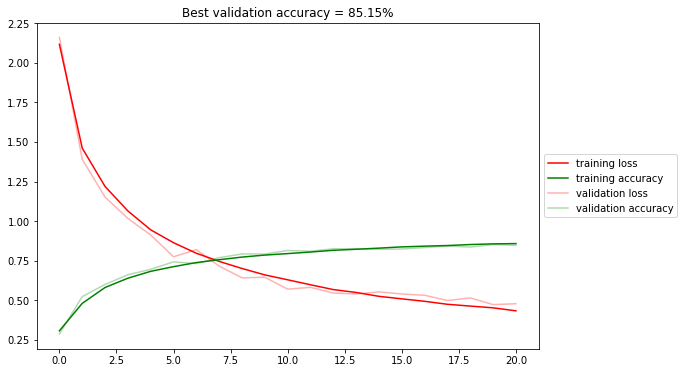

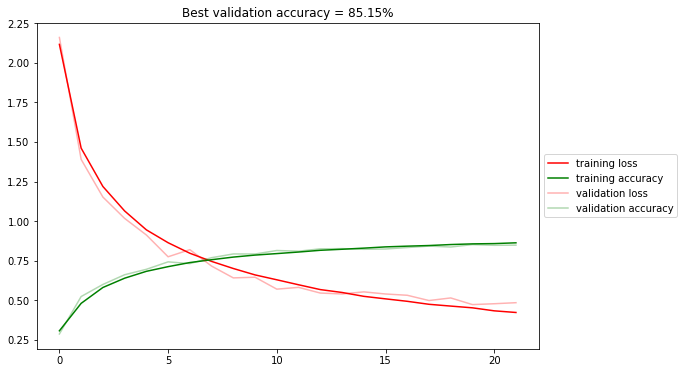

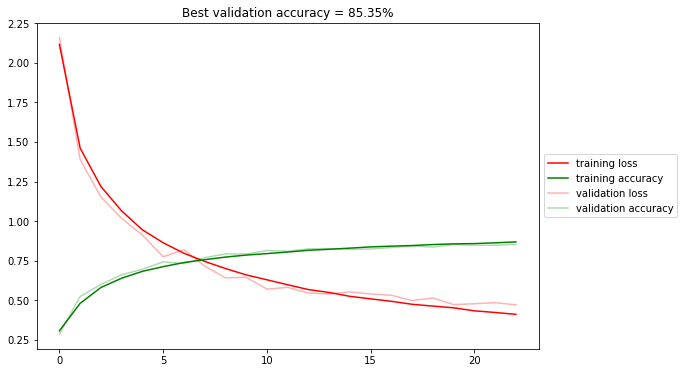

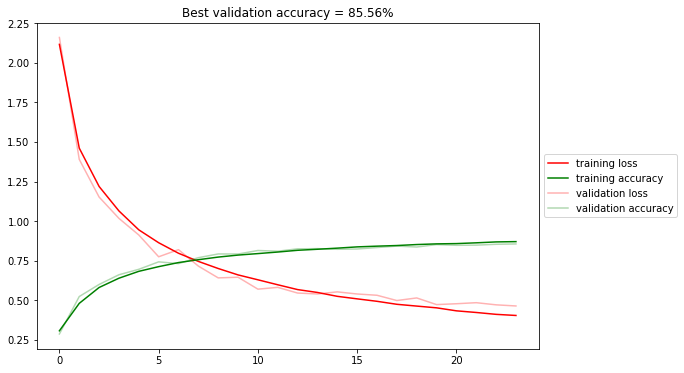

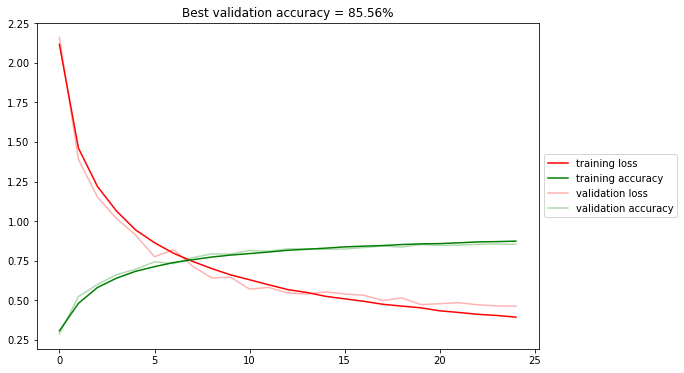

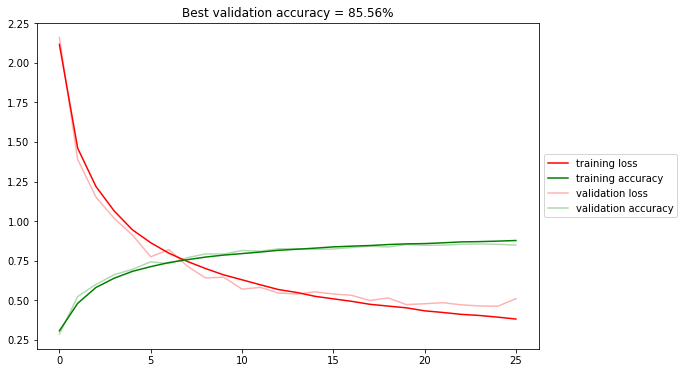

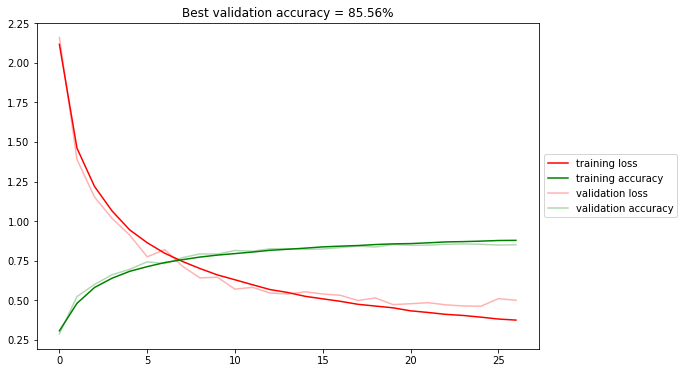

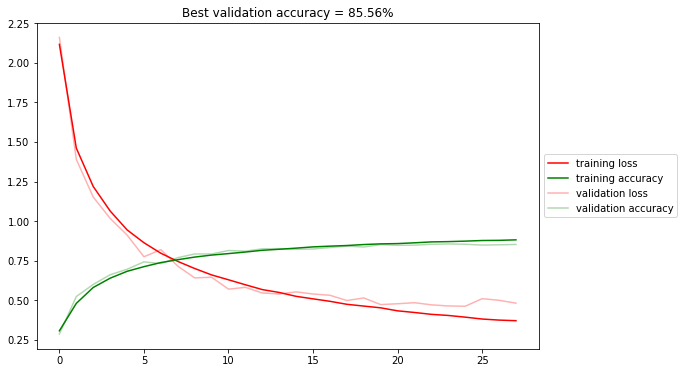

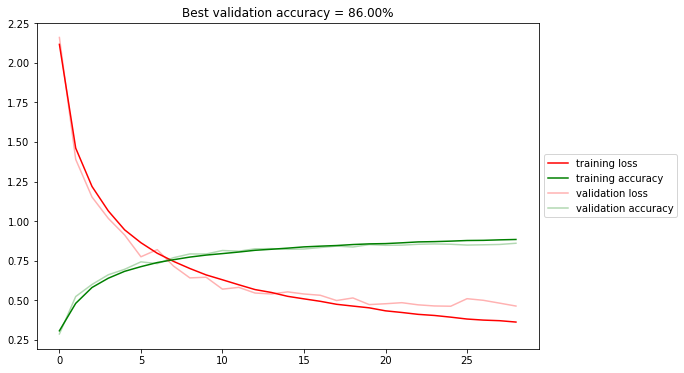

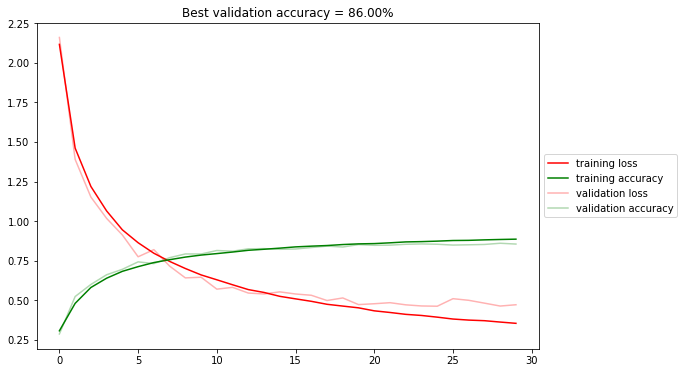

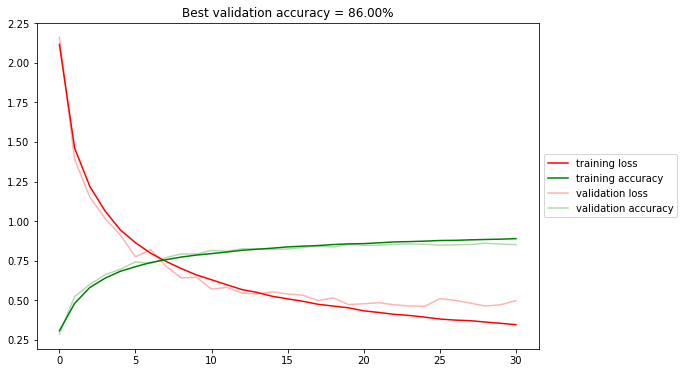

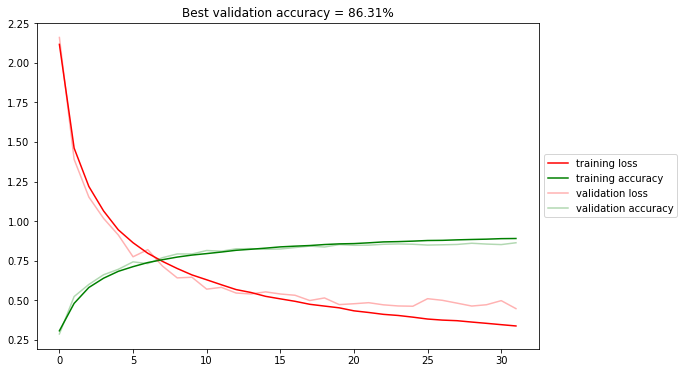

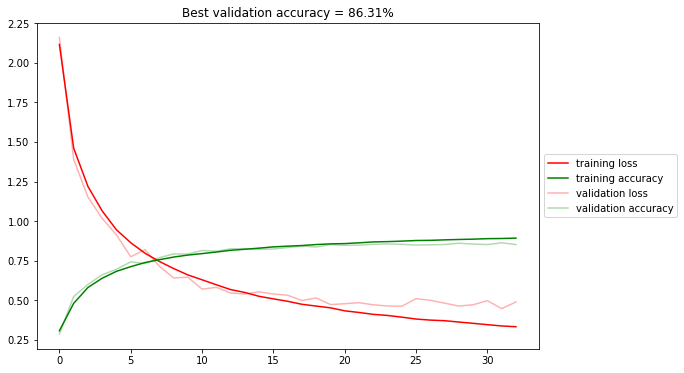

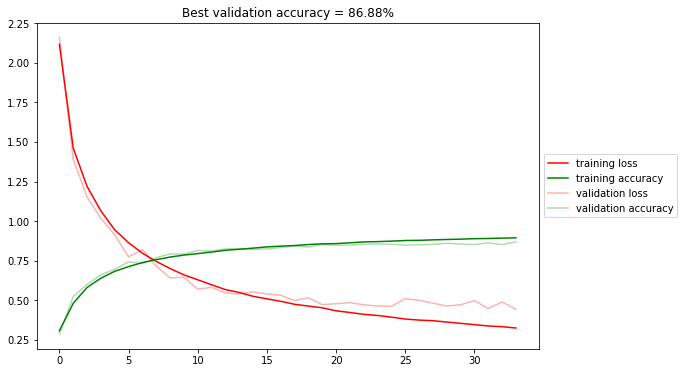

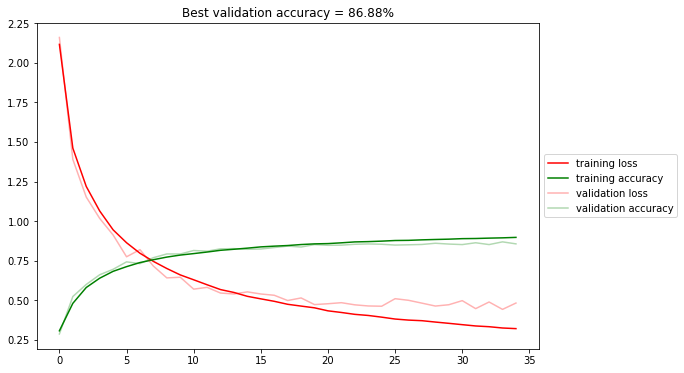

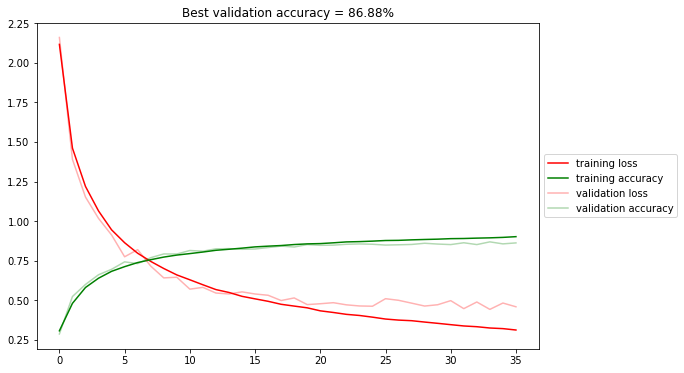

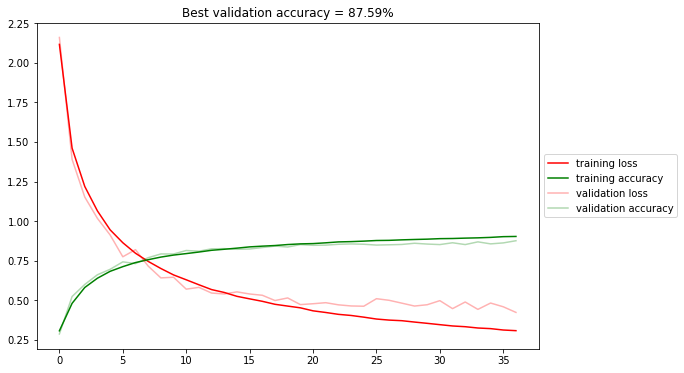

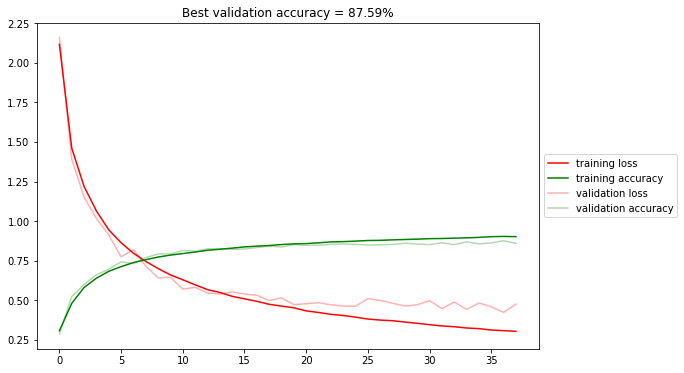

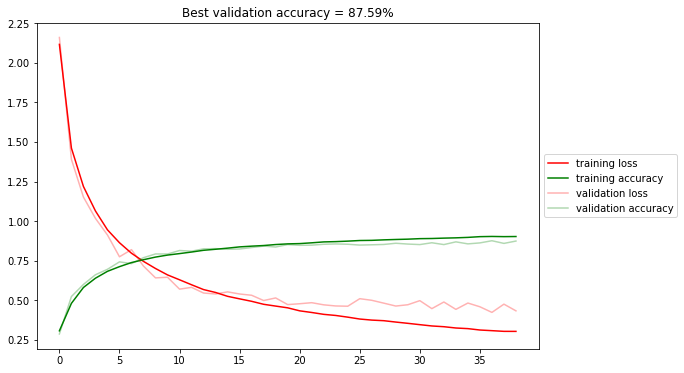

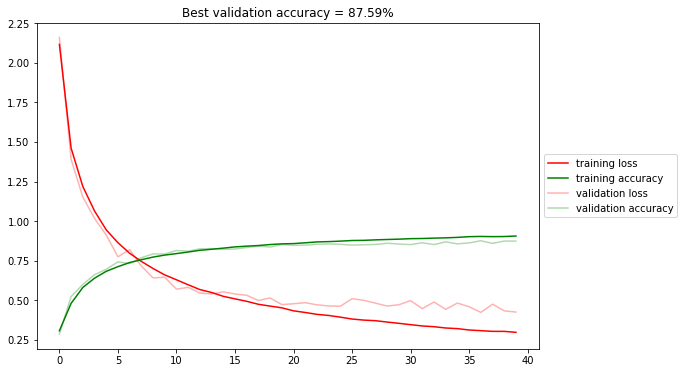

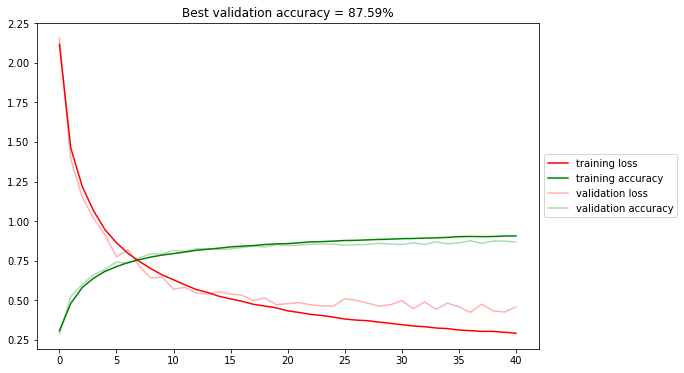

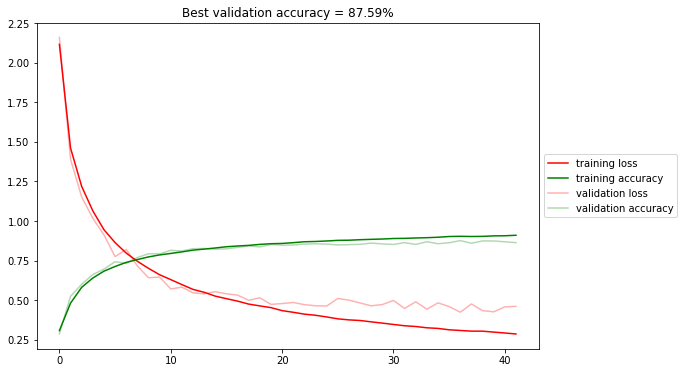

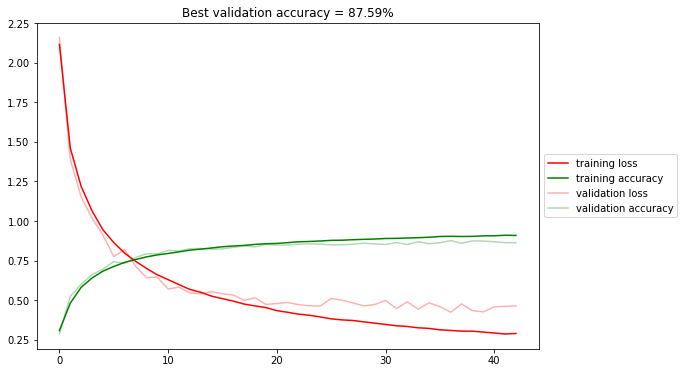

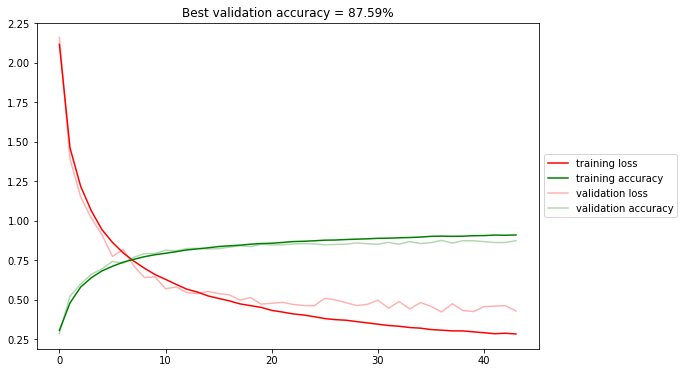

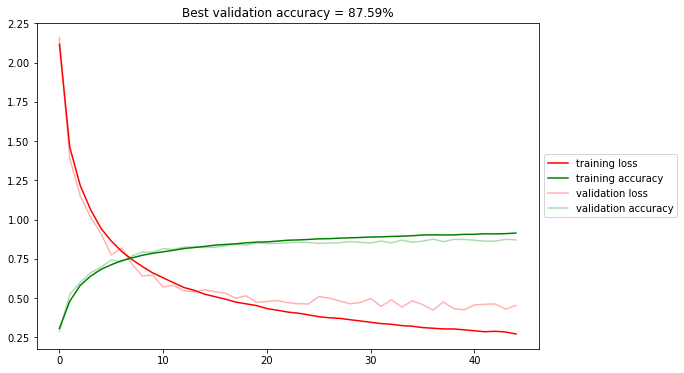

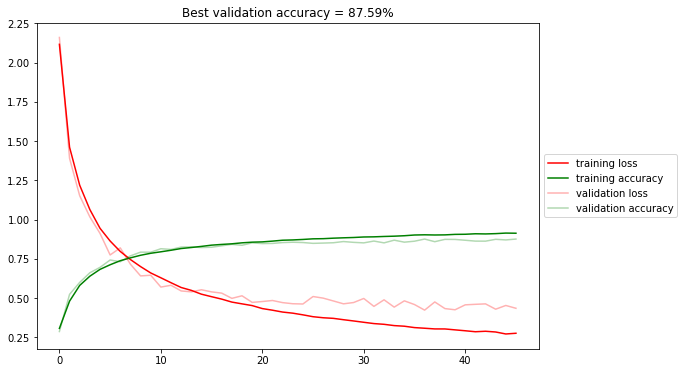

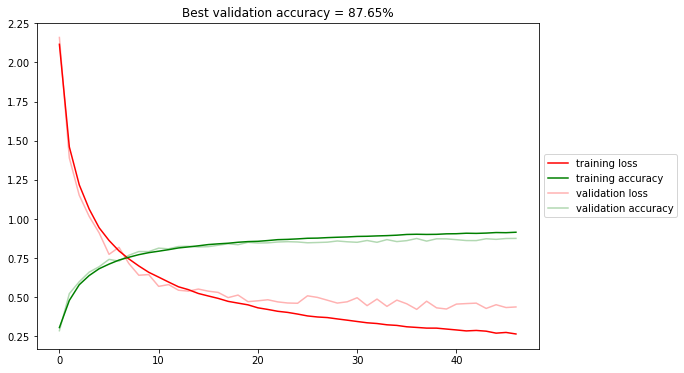

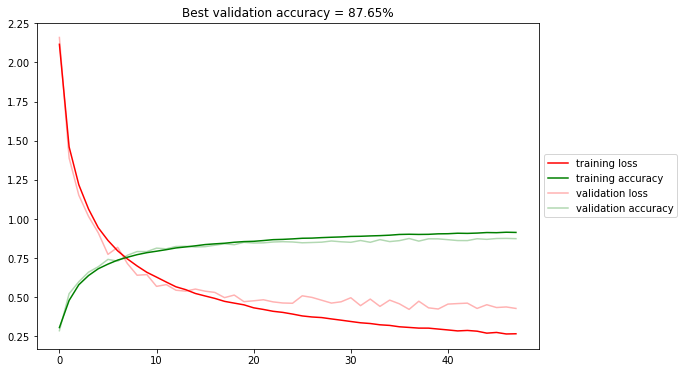

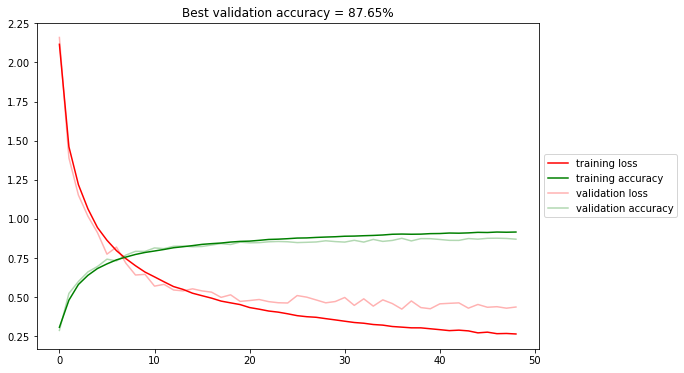

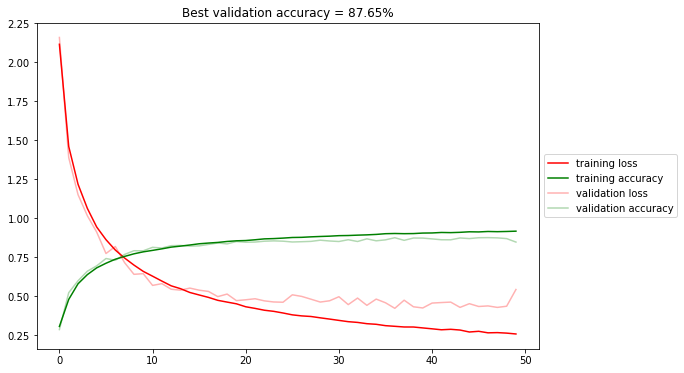

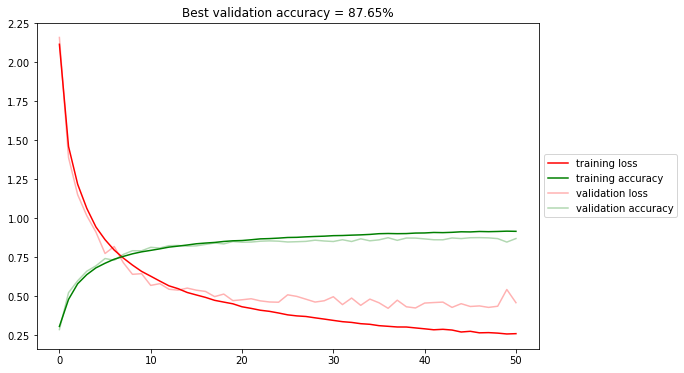

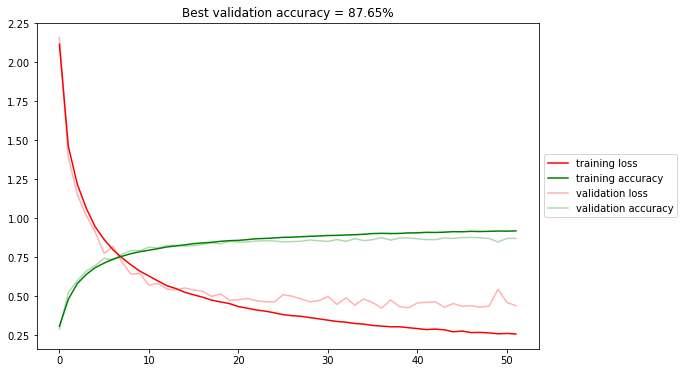

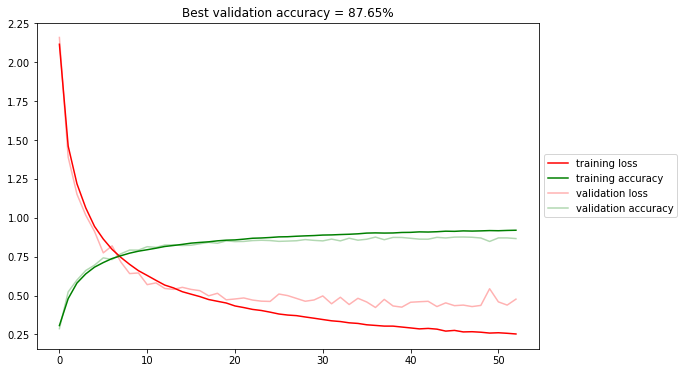

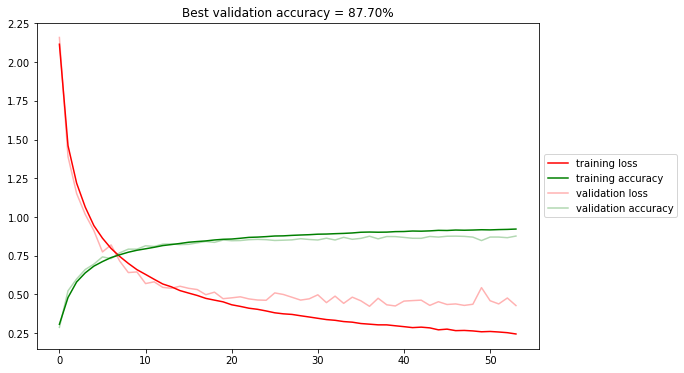

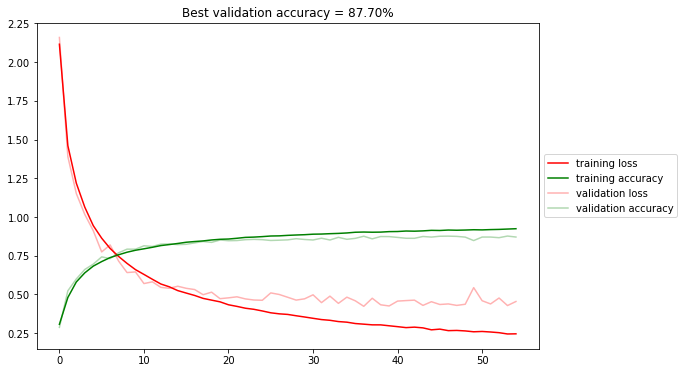

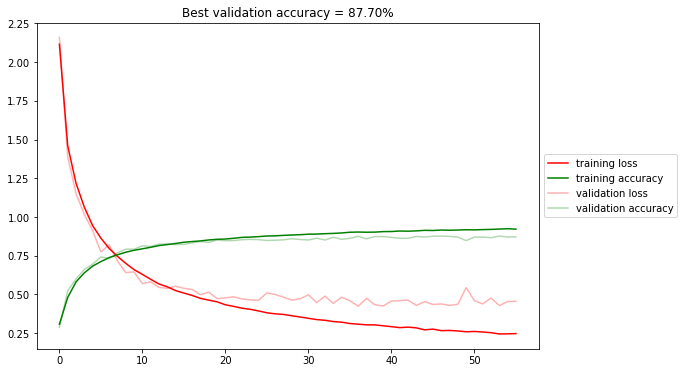

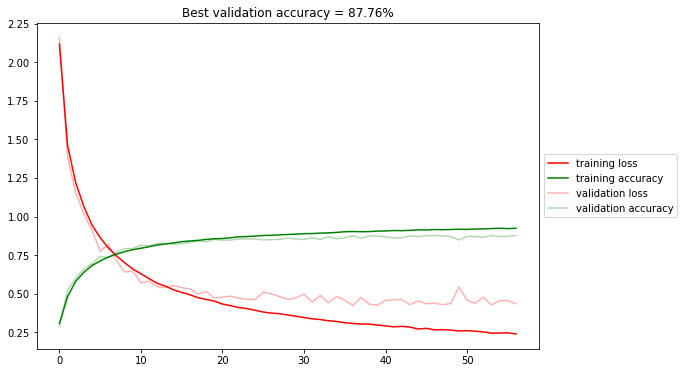

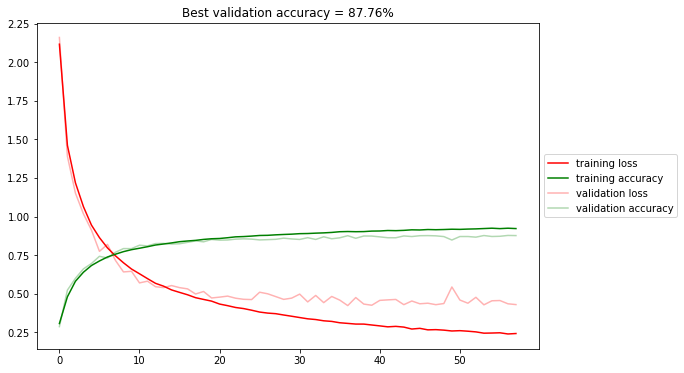

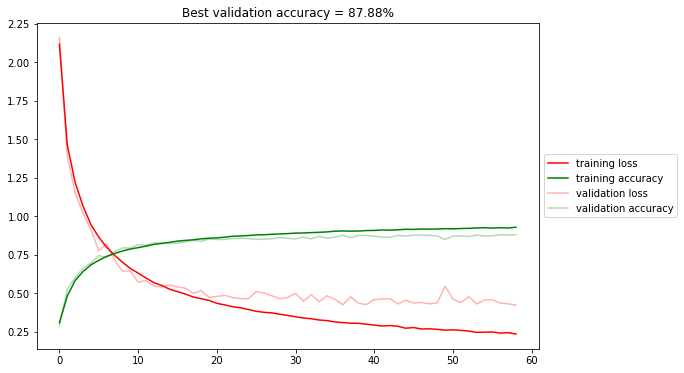

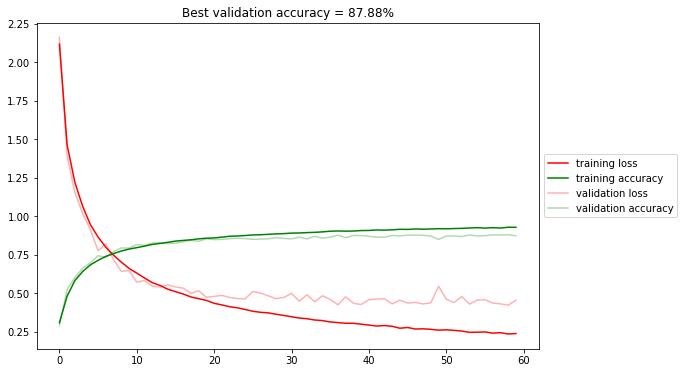

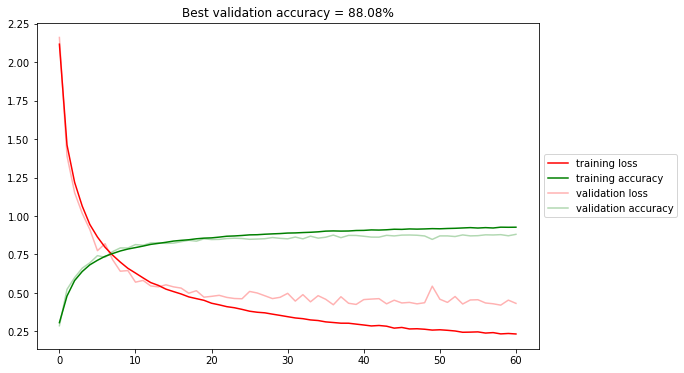

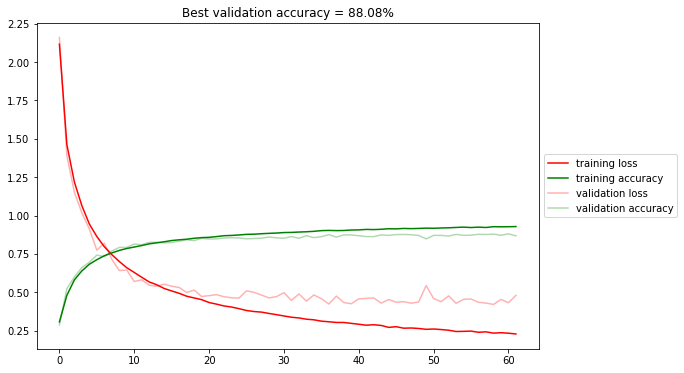

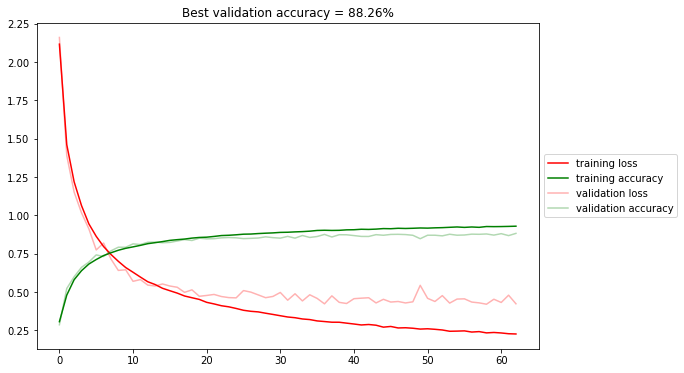

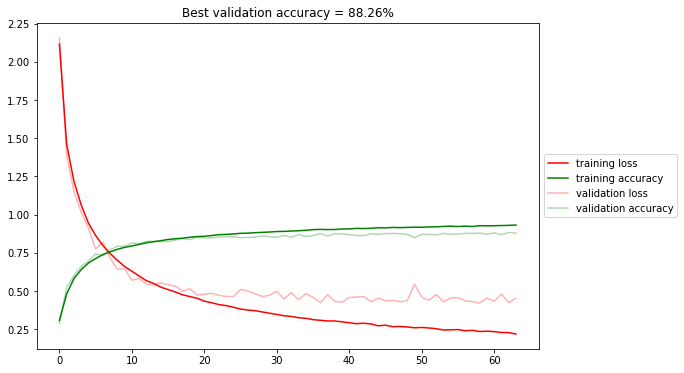

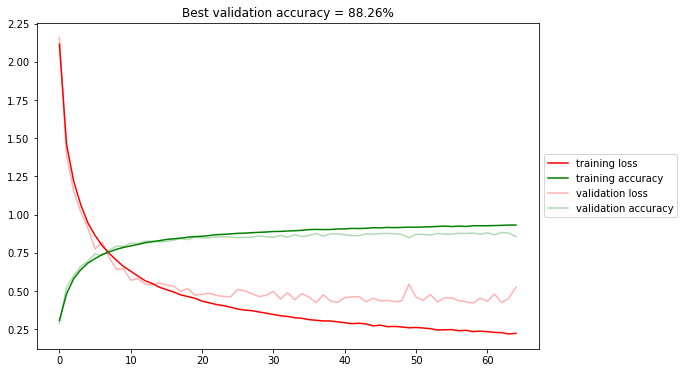

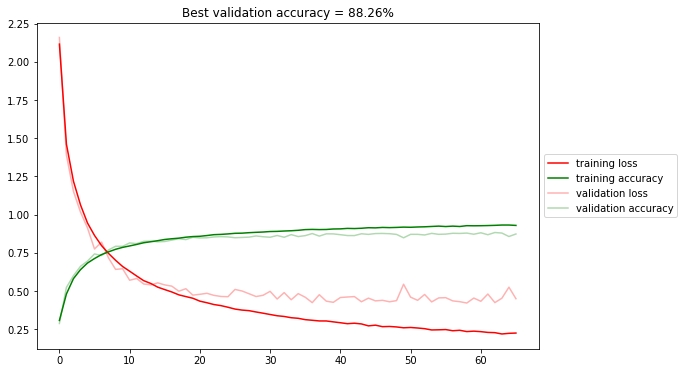

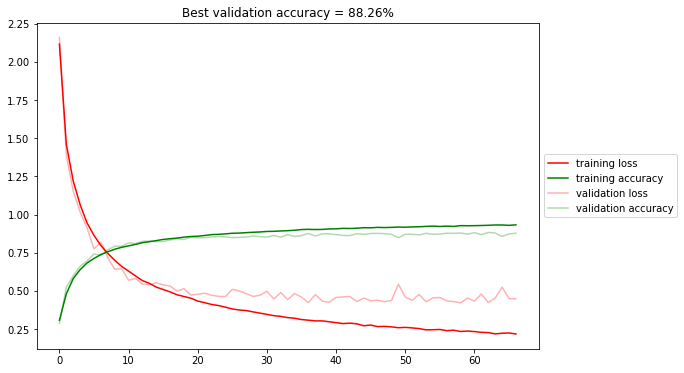

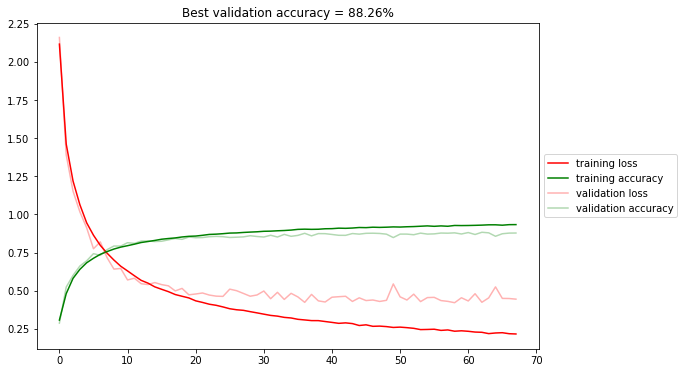

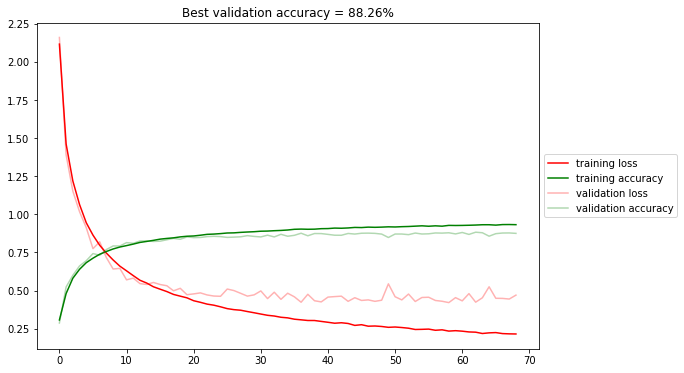

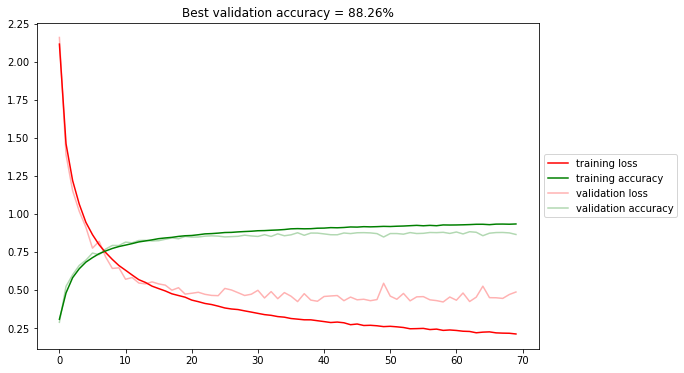

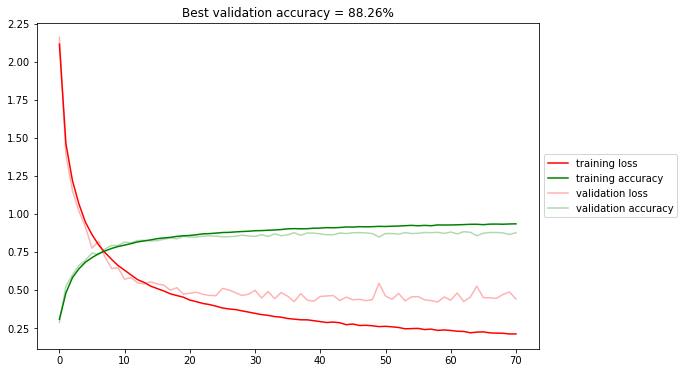

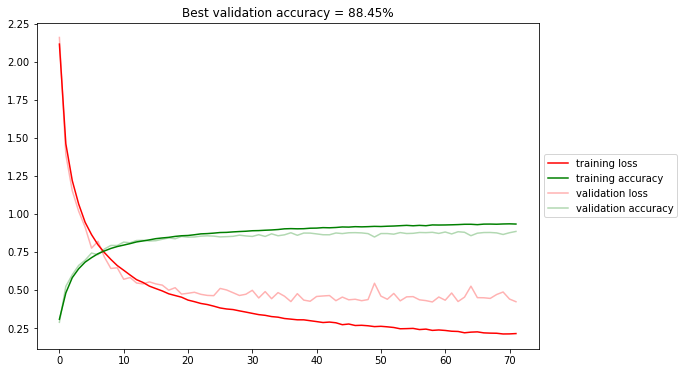

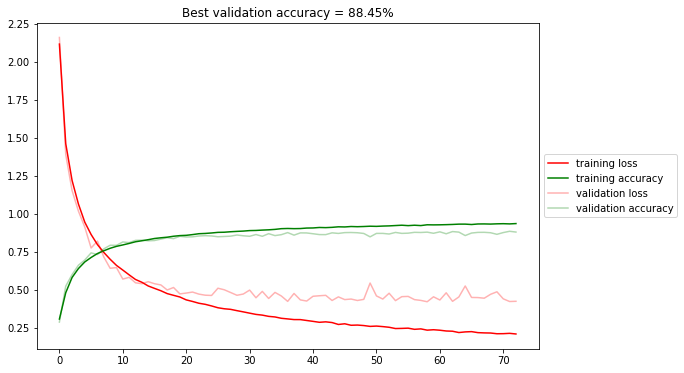

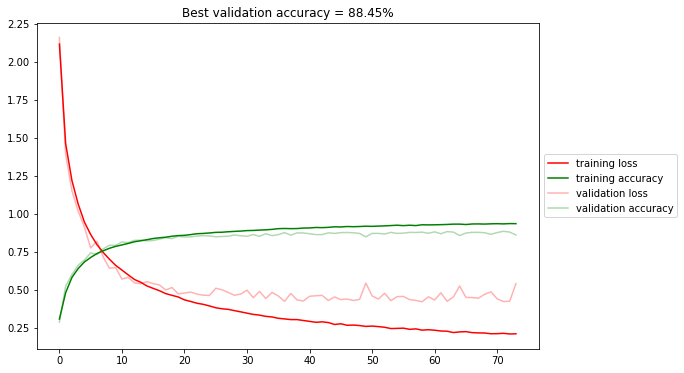

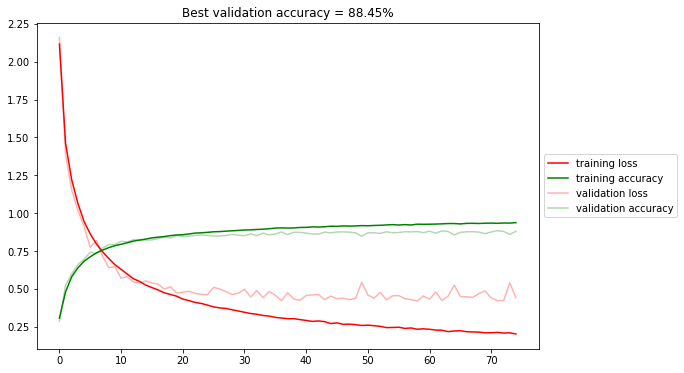

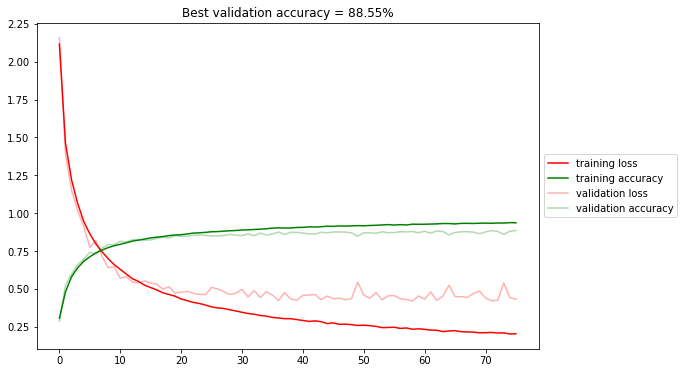

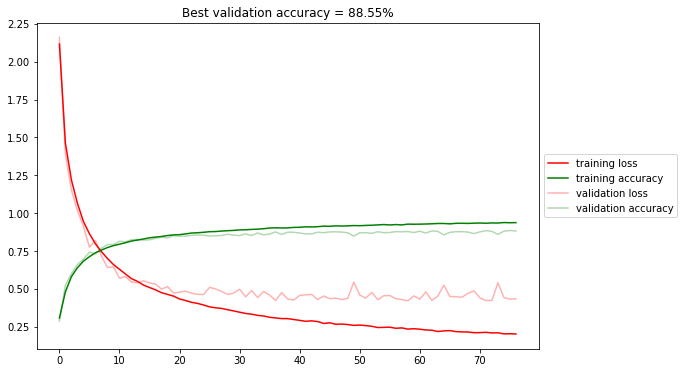

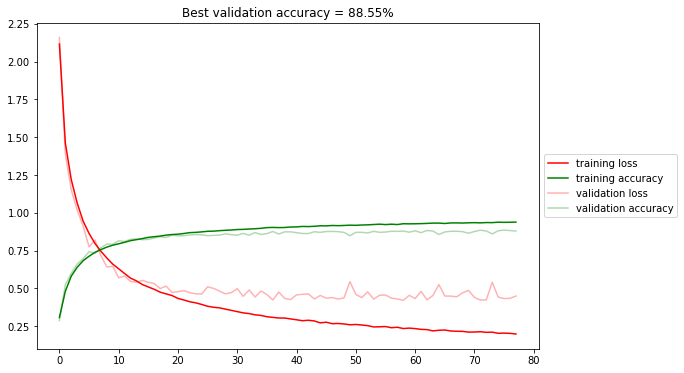

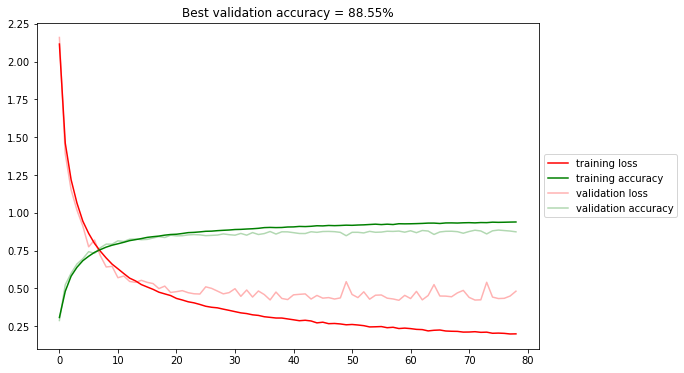

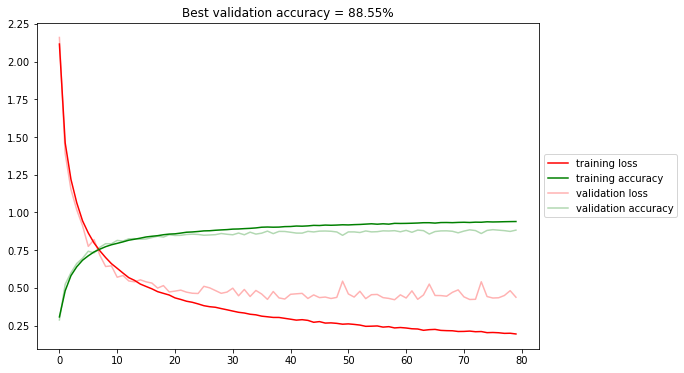

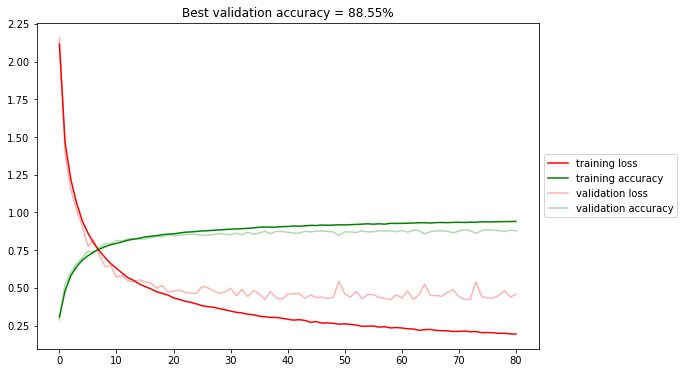

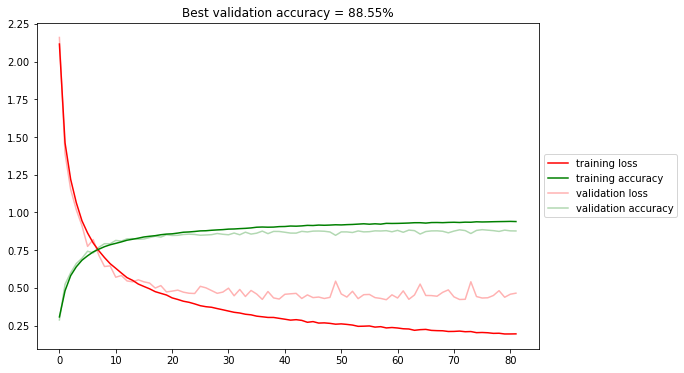

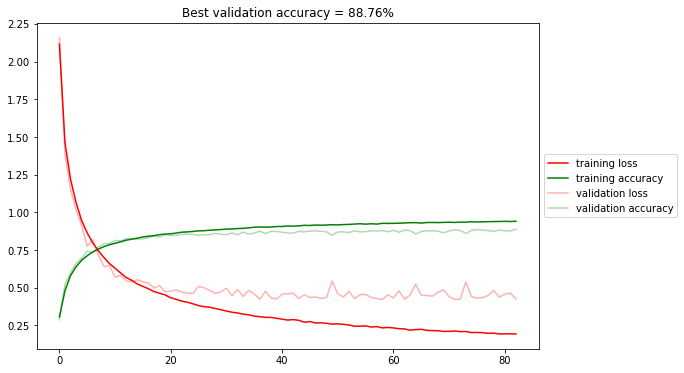

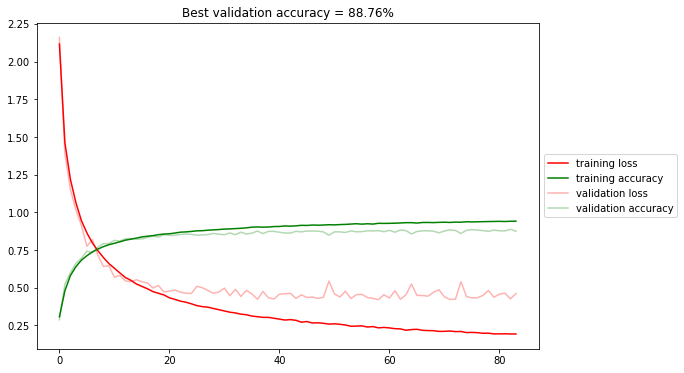

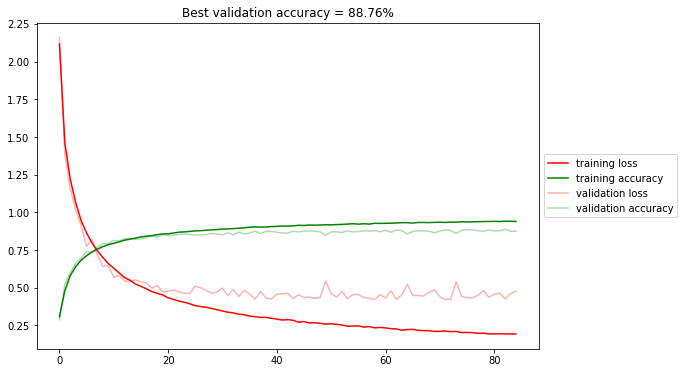

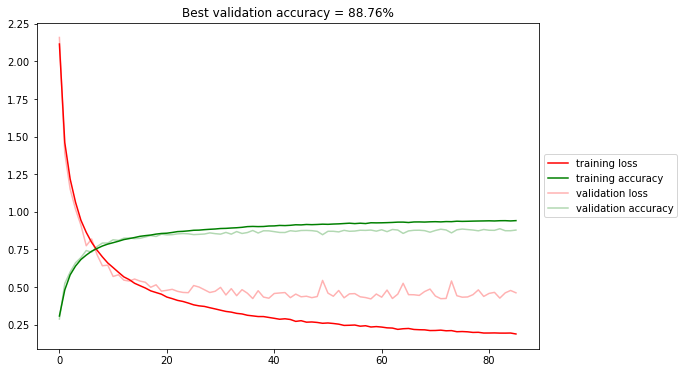

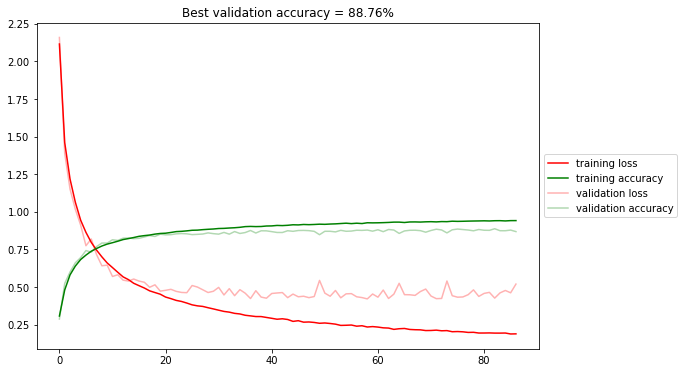

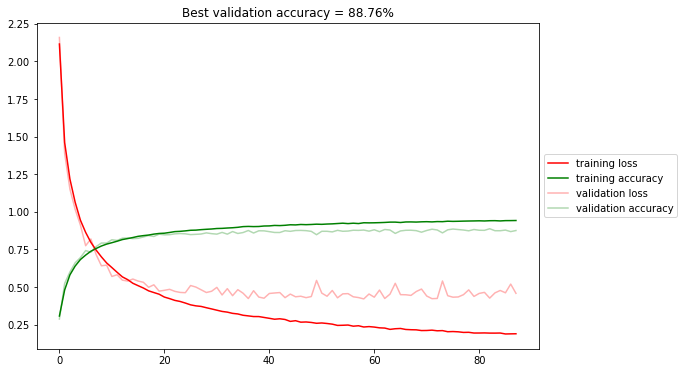

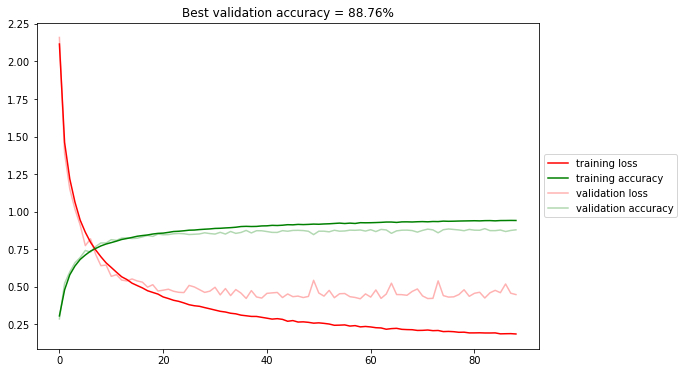

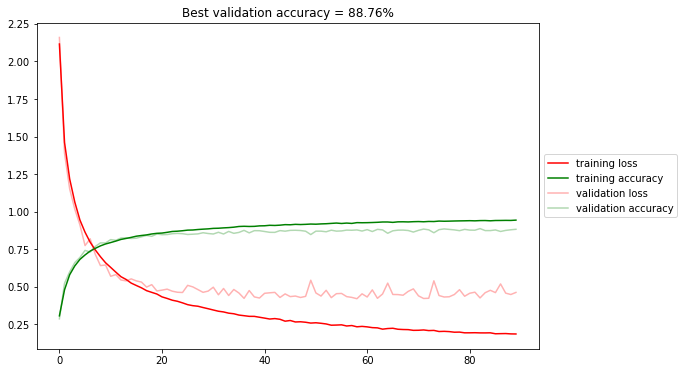

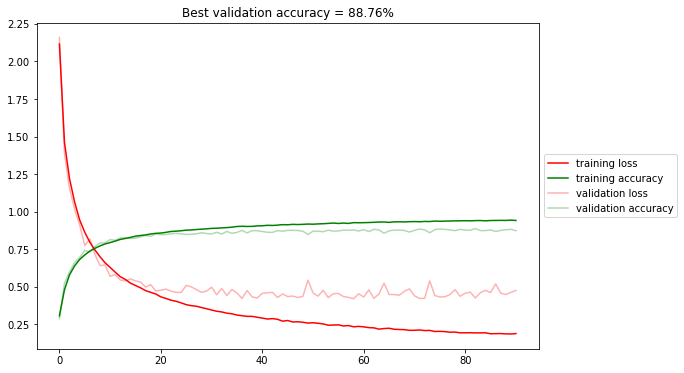

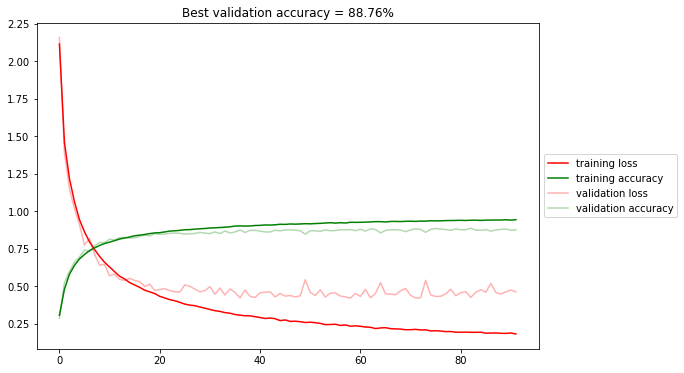

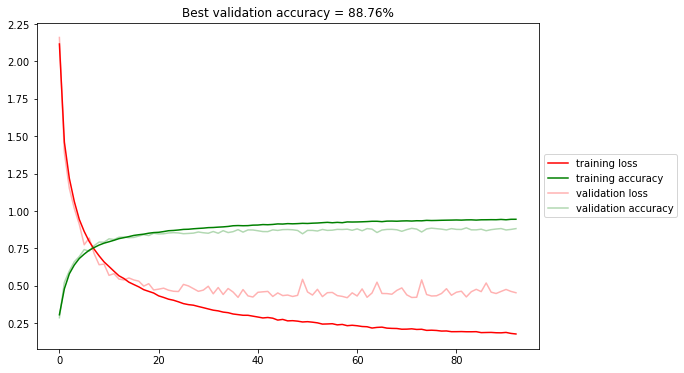

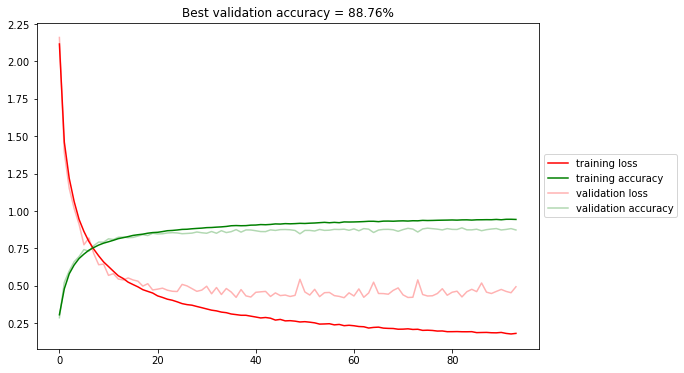

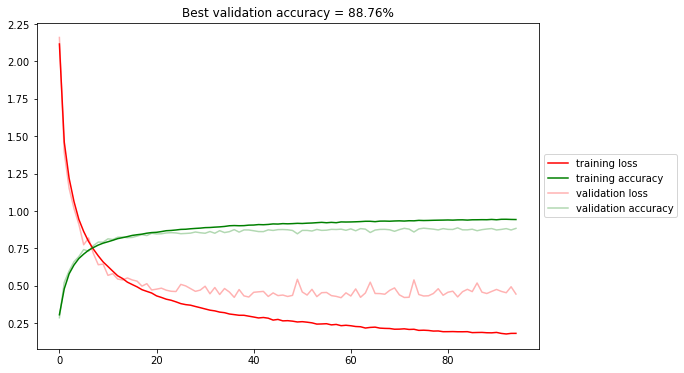

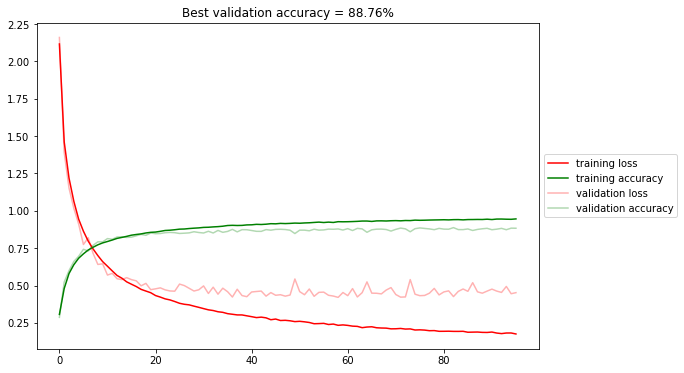

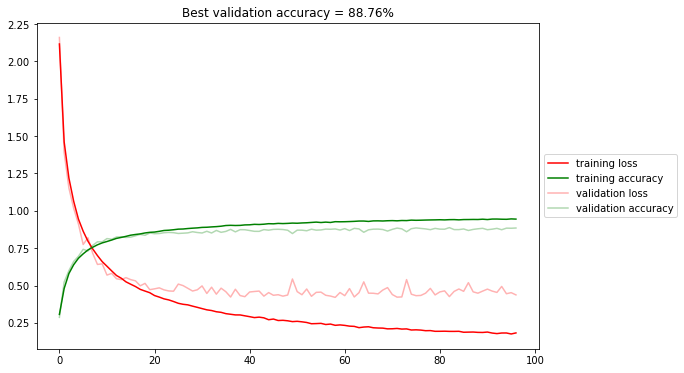

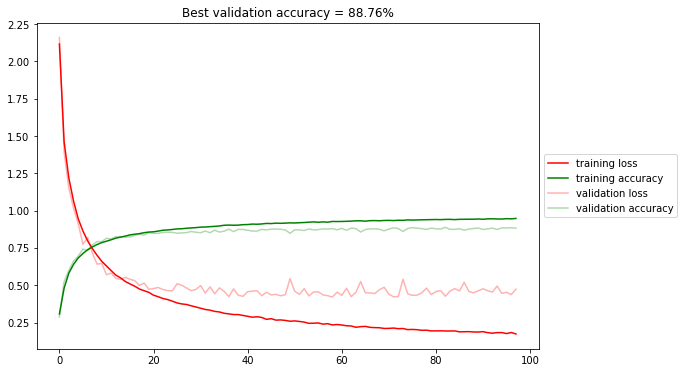

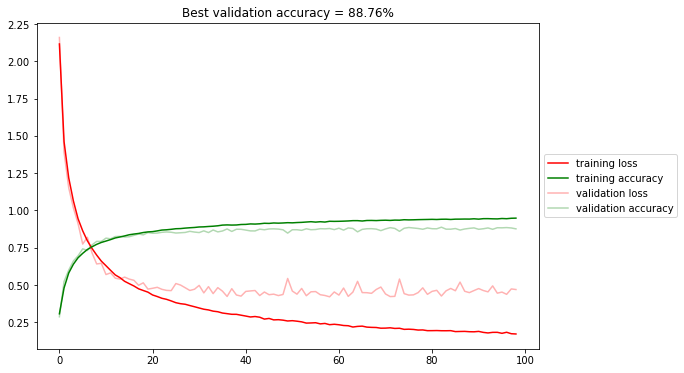

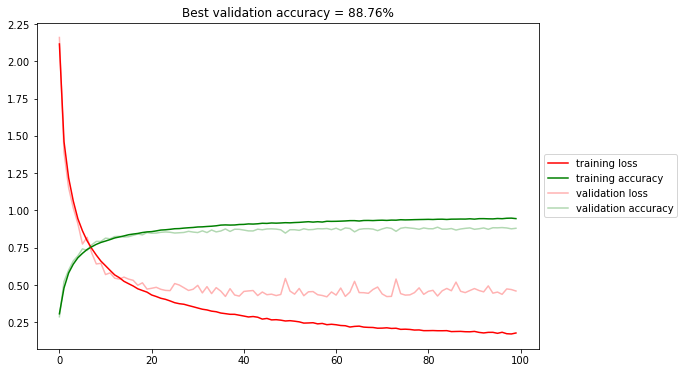

In [ ]:
fit_model(model, X_train, y_train, X_test, y_test, 100, 128)